- Task: Flight Price prediction
- Model: Random Forest Regressior
- Data: Kaggle

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/Data_Train_flight price.xlsx'
df = pd.read_excel(path)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Exploring the dataset**

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All the columns excpet the target-price are categorical in nature

In [ ]:
# check null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# drop null values

df = df.dropna()

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


**Feature Engineering**

In [ ]:
pd.to_datetime(df['Date_of_Journey']).dt.year.unique()

array([2019])

The dataset has only one year of data. So we extract the day and the month from the date.

In [ ]:
# extract month and day from date of journey

df['journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [ ]:
# extract hour and minute from departure time

df['departure_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['departure_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [ ]:
df = df.drop(['Date_of_Journey','Dep_Time'],axis=1)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [ ]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [ ]:
df['arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [ ]:
df = df.drop(['Arrival_Time'],axis=1)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [ ]:
flight_duration = df['Duration'].tolist()
len(flight_duration)

10682

In [ ]:
for i in range(len(flight_duration)):
  if len(flight_duration[i].split()) != 2:
      if 'h' in flight_duration[i]:
        flight_duration[i] = flight_duration[i].strip()+' 0m'
        print(flight_duration[i])
      else:
        flight_duration[i] = '0h '+flight_duration[i]
        print(flight_duration[i])

19h 0m
23h 0m
22h 0m
12h 0m
3h 0m
5h 0m
10h 0m
18h 0m
3h 0m
24h 0m
15h 0m
16h 0m
8h 0m
14h 0m
8h 0m
20h 0m
13h 0m
16h 0m
10h 0m
12h 0m
3h 0m
11h 0m
15h 0m
9h 0m
8h 0m
3h 0m
3h 0m
27h 0m
8h 0m
3h 0m
9h 0m
3h 0m
11h 0m
3h 0m
3h 0m
5h 0m
27h 0m
26h 0m
10h 0m
11h 0m
9h 0m
4h 0m
5h 0m
3h 0m
3h 0m
16h 0m
7h 0m
9h 0m
9h 0m
24h 0m
5h 0m
14h 0m
3h 0m
11h 0m
9h 0m
13h 0m
5h 0m
3h 0m
3h 0m
30h 0m
18h 0m
8h 0m
12h 0m
3h 0m
5h 0m
14h 0m
3h 0m
4h 0m
11h 0m
8h 0m
5h 0m
21h 0m
27h 0m
20h 0m
3h 0m
3h 0m
12h 0m
11h 0m
24h 0m
3h 0m
9h 0m
11h 0m
5h 0m
27h 0m
20h 0m
8h 0m
26h 0m
3h 0m
10h 0m
28h 0m
3h 0m
10h 0m
7h 0m
8h 0m
3h 0m
8h 0m
3h 0m
26h 0m
11h 0m
3h 0m
20h 0m
47h 0m
3h 0m
10h 0m
15h 0m
13h 0m
14h 0m
6h 0m
24h 0m
11h 0m
10h 0m
5h 0m
16h 0m
15h 0m
10h 0m
3h 0m
5h 0m
14h 0m
11h 0m
11h 0m
3h 0m
22h 0m
16h 0m
12h 0m
3h 0m
26h 0m
5h 0m
10h 0m
13h 0m
8h 0m
3h 0m
26h 0m
10h 0m
12h 0m
9h 0m
10h 0m
8h 0m
3h 0m
11h 0m
3h 0m
22h 0m
8h 0m
27h 0m
3h 0m
3h 0m
3h 0m
19h 0m
9h 0m
15h 0m
3h 0m
10h 0m
6h 0m
5h 0m
3h 

In [ ]:
'3h 0m'.split(sep='m')[0].split()

['3h', '0']

In [ ]:
duration_hours = []
duration_minute = []
for i in range(len(flight_duration)):
  duration_hours.append(int(flight_duration[i].split(sep='h')[0]))
  duration_minute.append(int(flight_duration[i].split(sep='m')[0].split()[-1]))
len(duration_hours)
len(duration_minute)

10682

In [ ]:
df['duration_hour'] = duration_hours
df['duration_minute'] = duration_minute

In [ ]:
df = df.drop(['Duration'],axis=1)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [ ]:
df1 = df.groupby('Airline').sum()['Price'].sort_values(ascending=False)

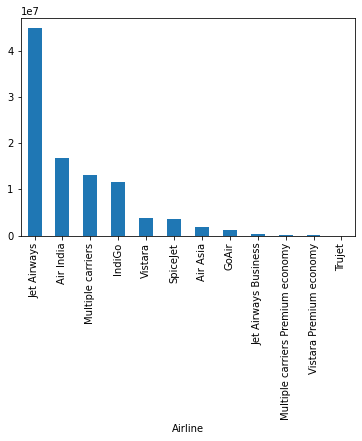

In [ ]:
df1.plot(kind='bar')

Jet Airways has the highest price and Trujet has the lowest price

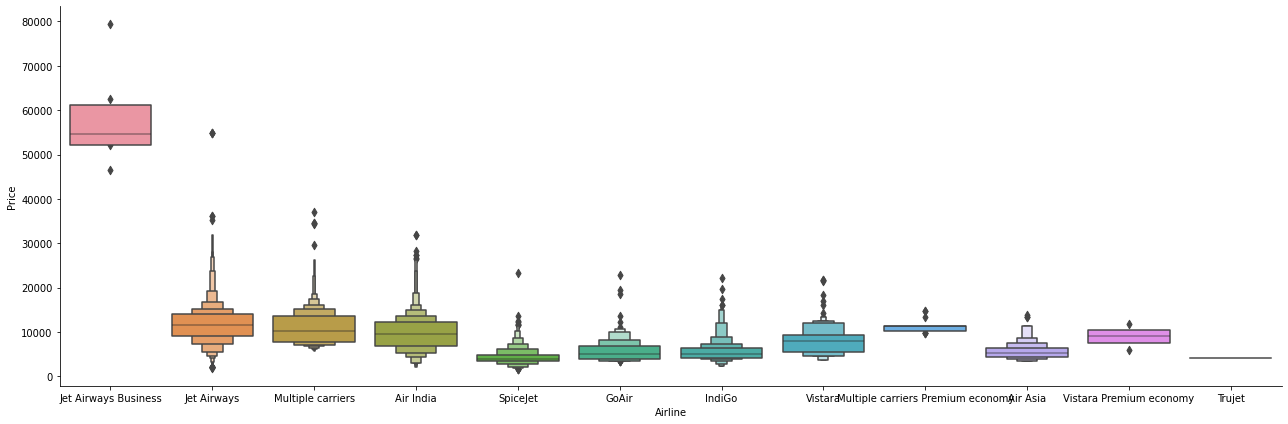

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
airline = df[['Airline']]
ohe = OneHotEncoder()
ohe.fit(airline)

OneHotEncoder()

In [ ]:
ohe_airline = ohe.get_feature_names_out().tolist()
airline[ohe_airline] = ohe.transform(airline).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
airline = airline.iloc[:,1:]
airline.head(2)
airline.shape

(10682, 12)

In [ ]:
df.groupby(['Source']).sum()['Price'].sort_values(ascending=False)

Source
Delhi       47809955
Kolkata     26293736
Banglore    17614369
Mumbai       3526617
Chennai      1824949
Name: Price, dtype: int64

From Delhi the flight are most expensive

In [ ]:
source = df[['Source']]
ohe.fit(source)

OneHotEncoder()

In [ ]:
ohe_source = ohe.get_feature_names_out().tolist()
source[ohe_source] = ohe.transform(source).toarray()
source = source.iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
source.head(2)
source.shape

(10682, 5)

In [ ]:
df.groupby(['Destination']).sum()['Price'].sort_values(ascending=False)

Destination
Cochin       47809955
Banglore     26293736
New Delhi    11107312
Delhi         6507057
Hyderabad     3526617
Kolkata       1824949
Name: Price, dtype: int64

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
destination = df[['Destination']]
ohe.fit(destination)


OneHotEncoder()

In [ ]:
ohe_dest = ohe.get_feature_names_out().tolist()
destination[ohe_dest] = ohe.transform(destination).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
destination = destination.iloc[:,1:]
destination.shape

(10682, 6)

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


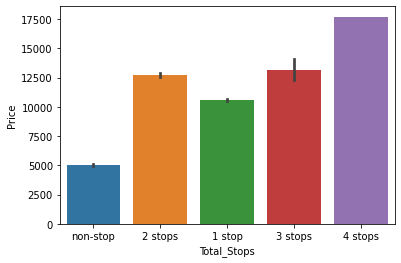

In [ ]:
sns.barplot(df['Total_Stops'],df['Price'].sort_values(ascending=False))
plt.show()

In [ ]:
df = df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [ ]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df = df.drop(['Route','Additional_Info'],axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [ ]:
df_x = pd.concat([df,source,airline,destination],axis=1)

In [ ]:
df_x.shape

(10682, 36)

In [ ]:
df_x = df_x.drop(['Airline','Source','Destination'],axis=1)

In [ ]:
df_x.head(2)

,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,7662,5,1,5,50,13,15,7,25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = df_x.drop(['Price'],axis=1)
y = df['Price']
print(x.shape,y.shape)

(10682, 32) (10682,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
print(x_train.shape,y_train.shape)

(7156, 32) (7156,)


In [ ]:
x_train.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'departure_hour',
       'departure_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_minute', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.9561667276448543

In [ ]:
rf.score(x_test,y_test)

0.8009108771157232

In [ ]:
from sklearn import metrics
pred = rf.predict(x_test)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Sqaured Error:',metrics.mean_squared_error(y_test,pred))
print('Root Mean Sqaured Error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 score:',metrics.r2_score(y_test,pred))

Mean Absolute Error: 1172.1295700192304
Mean Sqaured Error: 3996413.7583150635
Root Mean Sqaured Error: 1999.1032385334838
R2 score: 0.8009108771157232


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_grid.fit(x_train,y_train)

# Summarize the results in a readable format
print("Best params: {0}, using {1}".format(rf_grid.cv_results_['mean_test_score'], rf_grid.best_params_))
results_df = pd.DataFrame(rf_grid.cv_results_)

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.5s
[CV] END max_depth=25, max_feature

In [ ]:
rf_grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
predict_rf = rf_grid.predict(x_test)


In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Sqaured Error:',metrics.mean_squared_error(y_test,pred))
print('Root Mean Sqaured Error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 score:',metrics.r2_score(y_test,pred))

Mean Absolute Error: 1172.1295700192304
Mean Sqaured Error: 3996413.7583150635
Root Mean Sqaured Error: 1999.1032385334838
R2 score: 0.8009108771157232


In [ ]:

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predict_rf))
print('Mean Sqaured Error:',metrics.mean_squared_error(y_test,predict_rf))
print('Root Mean Sqaured Error:',np.sqrt(metrics.mean_squared_error(y_test,predict_rf)))
print('R2 score:',metrics.r2_score(y_test,predict_rf))

Mean Absolute Error: 1159.3850320641532
Mean Sqaured Error: 3638327.591636213
Root Mean Sqaured Error: 1907.440062396775
R2 score: 0.8187496358510407
